# Machine Learning libraries in Python

* [node2vec](https://snap.stanford.edu/node2vec/)
* [DeepWalk](https://github.com/phanein/deepwalk)
* [PyG (PyTorch Geometric)](https://www.pyg.org/)
* [Deep Graph Library (DGL)](https://www.dgl.ai/)
* [Stanford Network Analysis Platform (SNAP)](https://github.com/snap-stanford/snap)
* [Graph Nets](https://github.com/deepmind/graph_nets)
* [Spektral](https://graphneural.network/)
* [Jraph](https://github.com/deepmind/jraph)
* [Pointer Networks PyTorch](https://github.com/jojonki/Pointer-Networks)
* [TensorFlow-Pointer-Networks](https://github.com/ikostrikov/TensorFlow-Pointer-Networks)
* [OpenAI Gym](https://github.com/openai/gym)
* [TF-Agents](https://www.tensorflow.org/agents)
* [Keras-RL](https://github.com/keras-rl/keras-rl)
* [pyqlearning](https://github.com/accel-brain/accel-brain-code/tree/master/Reinforcement-Learning)
* [Flow](https://flow-project.github.io/)

## Karate Club Dataset

Zachary's karate club dataset is a graph-based dataset commonly used in network analysis and graph-based machine learning algorithms. It represent a social network that contains information about the relationships between 34 individuals in a karate club. It was created and first described by Wayne W. Zachary in his paper "An Information Flow Model for Conflict and Fission in Small Groups" back to 1977, and has since become a popular benchmark dataset for evaluating graph-based machine learning algorithms. 

In [1]:
# !pip install karateclub

In [2]:
from karateclub.utils.walker import RandomWalker, BiasedRandomWalker
from karateclub import DeepWalk, Node2Vec
import networkx as nx
from sklearn.decomposition import PCA
G=nx.karate_club_graph()
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


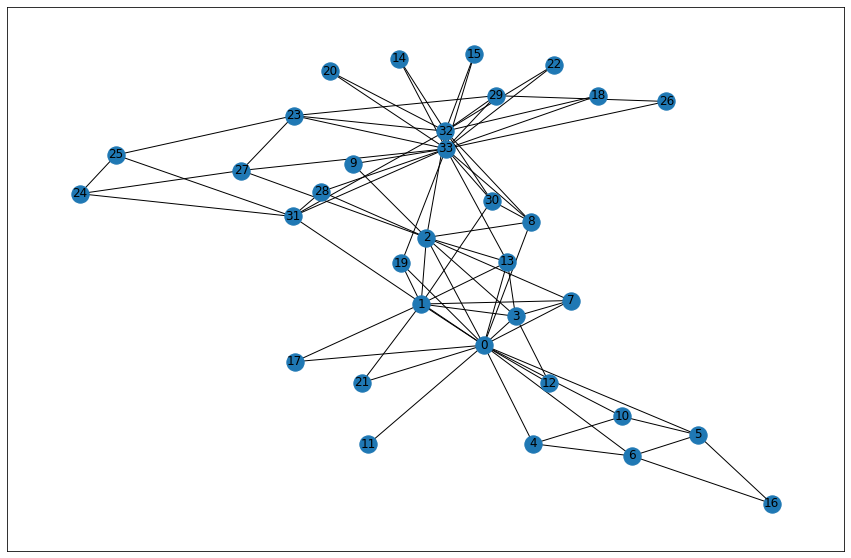

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
nx.draw_networkx(G)
plt.show()

# node2vec Example

In [4]:
# pip install node2vec

In [5]:
# import the required libraries 
import networkx as nx
from node2vec import Node2Vec

# Create a sample graph
G = nx.karate_club_graph()

# Create an instance of the Node2Vec class
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Learn the representations
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get the representations of all nodes
representations_all = model.wv.vectors

# Get the representations of a specific node
representations_specific = model.wv['1']

# Print the representations of a specific node
print(representations_specific)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

[ 0.16901225  0.04512253  0.19046433 -0.07347241 -0.0509594  -0.15386163
  0.1202211   0.03300704 -0.2736412   0.0643548   0.05132398  0.07972368
 -0.02046908  0.2507754   0.20389155  0.1782678  -0.12778907  0.07633492
  0.00858985  0.24926828  0.15972796  0.16207254  0.08581764  0.02226478
 -0.00757956  0.10227398 -0.18585731  0.01775037 -0.07550006 -0.05141449
 -0.01452417 -0.19294618 -0.13363749 -0.22346261  0.00674001  0.01393766
  0.09569033  0.10937139  0.15908653  0.21669221  0.05965427  0.09696716
  0.16763094 -0.19520849 -0.2288166   0.04763156 -0.02366293 -0.17528151
  0.08308005 -0.07341089  0.17921434  0.19881682  0.0104638   0.0648042
  0.21923842  0.3599676   0.21925625 -0.07937516  0.00184601 -0.02647462
  0.10799335 -0.26823685 -0.28947333  0.12617068]


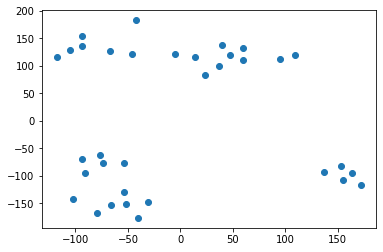

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
reduced_representations = tsne.fit_transform(representations_all)

# Plot the nodes
plt.scatter(reduced_representations[:, 0], reduced_representations[:, 1])
plt.show()
# plt.savefig('node2vec.png', format='png', dpi=300)

In [7]:
# save represenattion as csv file
import csv

# Write the representations to a CSV file
with open('representations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["node", "x", "y"])
    for i, vec in enumerate(representations_all):
        writer.writerow([i] + vec.tolist())       

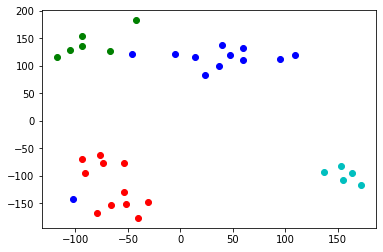

In [8]:
# cluster the generated representation
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(representations_all)

# Plot the nodes
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(4):
    plt.scatter(reduced_representations[clusters == i, 0], reduced_representations[clusters == i, 1], c=colors[i])
plt.show()

# DeepWalk Example

In [9]:
from karateclub.utils.walker import RandomWalker, BiasedRandomWalker
from karateclub import DeepWalk, Node2Vec
import networkx as nx
from sklearn.decomposition import PCA

In [10]:
G=nx.karate_club_graph()
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [11]:
#define DeepWalk mode and fit the graph
model=DeepWalk(dimensions=128, walk_length=100)
model.fit(G)

In [12]:
# Graph embedding
# The KarateClub has 34 memebers and each member is converted to a vector of size 128
embedding=model.get_embedding()
print('Embedding shape:', embedding.shape)


Embedding shape: (34, 128)


In [13]:
# In KarateClub data, member represented by each node belongs can be 'Mr. Hi' or 'Officer'
officer=[] #list to populate with labels
mr=[]
for i in G.nodes:
  t=G.nodes[i]['club']
  officer.append(True if t=='Officer' else False)
  mr.append(False if t=='Officer' else True)

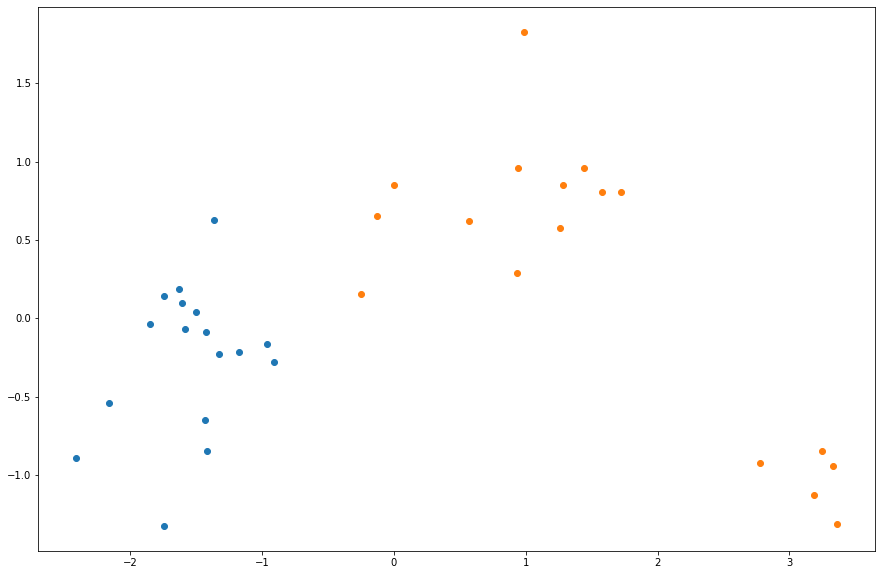

In [14]:
nodes=list(range(len(G)))
X=embedding[nodes]

# dimensionality reducation using Principal Component Analysis (PCA)
pca=PCA(n_components=2)
pca_out=pca.fit_transform(X)

plt.figure(figsize=(15, 10))
plt.scatter(pca_out[:,0][officer],pca_out[:,1][officer])
plt.scatter(pca_out[:,0][mr],pca_out[:,1][mr])
plt.show()
# plt.savefig("A1_F08_Karate.png", format="png", dpi=300)

# PyG Example

In [15]:
#install PyG
# !conda install pyg -c pyg

In [16]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

In [17]:
import os
import torch
os.environ['TORCH'] = torch.__version__
# # Install required packages
# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [18]:
# Helper function for visualization
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

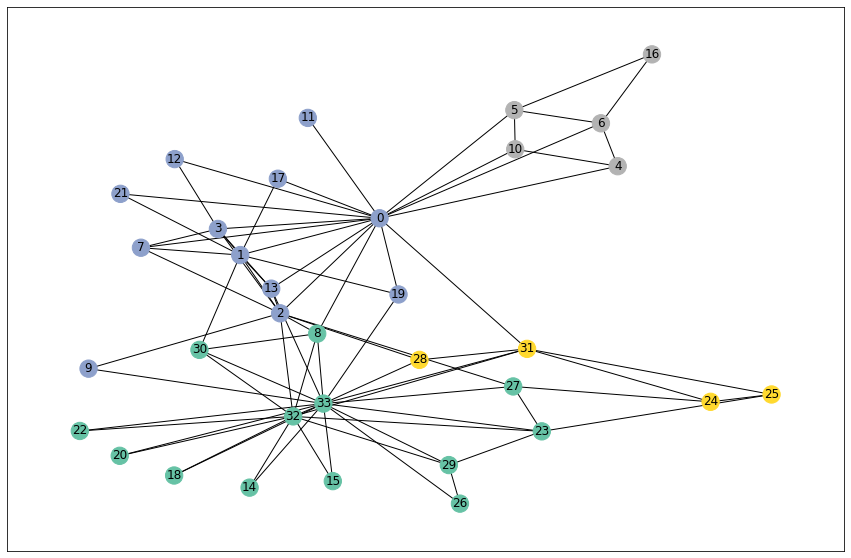

In [19]:
#use KarateClue dataset
dataset = KarateClub()
data = dataset[0]

#visualization example using pyG
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), node_color=data.y, cmap="Set2")
plt.show()

In [20]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

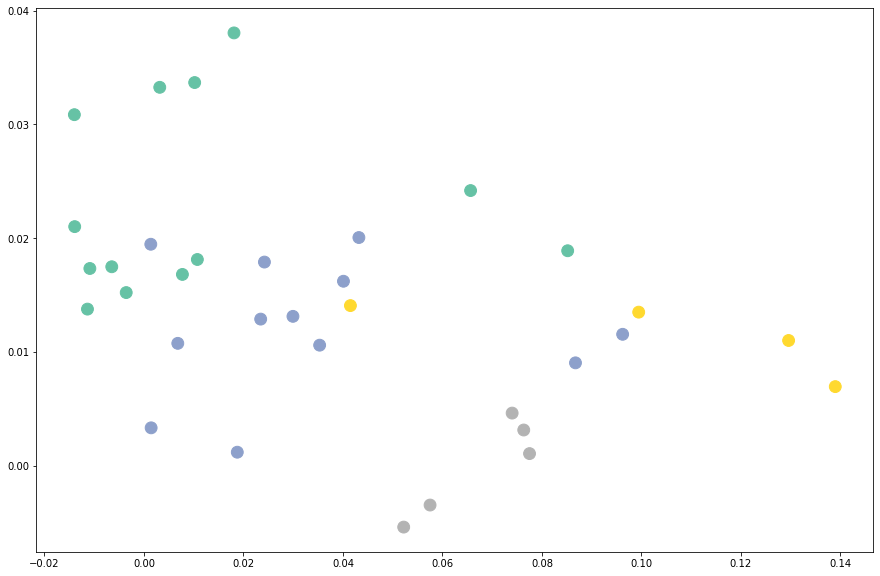

In [21]:

#define the model
model = GCN()

#the model returns embedded
_, h = model(data.x, data.edge_index)

#convert 'h' from tenser format to numpy format for visualize
h = h.detach().cpu().numpy()
plt.figure(figsize=(15, 10))
plt.scatter(h[:, 0], h[:, 1], s=140, c=data.y, cmap="Set2")

In [22]:
model = GCN()
# Define loss criterion.
criterion = torch.nn.CrossEntropyLoss()  
# Define optimizer and clear gradient
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer.zero_grad()

for epoch in range(401):
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

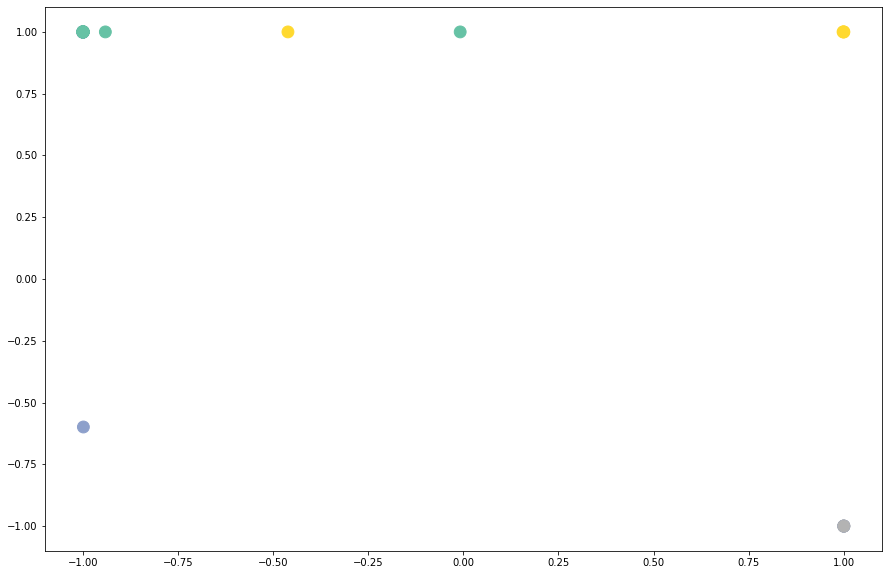

In [23]:
h = h.detach().cpu().numpy()
plt.figure(figsize=(15, 10))
plt.scatter(h[:, 0], h[:, 1], s=140, c=data.y, cmap="Set2")

# Deep Graph Library (DGL) Example

In [24]:
# pip install dgl -f https://data.dgl.ai/wheels/repo.html

In [25]:
import dgl
import torch
import numpy as np

#edge 0->1,1->2,2->3,3->0,
g1 = dgl.graph(([0, 1, 2 , 3], [1, 2, 3, 0]))
print(g1.num_nodes)
#edge 0->1,1->2
g2 = dgl.graph(([0, 1], [1, 2]))

bg = dgl.batch([g1, g2])

#add reverse edges to make a graph undirected
undir_g1 = dgl.add_reverse_edges(g1)

print("g1 edges: ", g1.edges(),"undirected g1 edges", undir_g1.edges())

<bound method DGLHeteroGraph.num_nodes of Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})>
g1 edges:  (tensor([0, 1, 2, 3]), tensor([1, 2, 3, 0])) undirected g1 edges (tensor([0, 1, 2, 3, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 0, 1, 2, 3]))


In [26]:
#creating a graph with different node types and edge types
g = dgl.heterograph({
    ('NodeA','EdgeB','NodeC'):([0,0,1,1],[1,2,3,4]),
    ('NodeD','EdgeE','NodeF'):([2,4],[3,5])
})
print("node types: ", g.ntypes)
print("edge types: ", g.etypes)
print("node with type A", g.nodes('NodeA'))

#merge all node and edge types
hg = dgl.to_homogeneous(g)
print(hg.ntypes)
print(hg.etypes)

node types:  ['NodeA', 'NodeC', 'NodeD', 'NodeF']
edge types:  ['EdgeB', 'EdgeE']
node with type A tensor([0, 1])
['_N']
['_E']


In [27]:
import dgl

dataset = dgl.data.CiteseerGraphDataset()
graph = dataset[0]

  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [28]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [29]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [30]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [31]:
node_features = graph.ndata['feat']
node_labels = graph.ndata['label']
train_mask = graph.ndata['train_mask']
valid_mask = graph.ndata['val_mask']
test_mask = graph.ndata['test_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)  

model = SAGE(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())

for epoch in range(10):
    model.train()
    # forward propagation by using all nodes
    logits = model(graph, node_features)
    # compute loss
    loss = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    # compute validation accuracy
    acc = evaluate(model, graph, node_features, node_labels, valid_mask)
    # backward propagation
    opt.zero_grad()
    loss.backward()
    opt.step()
    print(loss.item())

    # Save model if necessary.  Omitted in this example.

1.7901625633239746
1.7750025987625122
1.7598134279251099
1.7438675165176392
1.7271270751953125
1.7095253467559814
1.6911346912384033
1.6720175743103027
1.6521633863449097
1.6316511631011963


# Stanford Network Analysis Platform (SNAP)

In [32]:
# !python -m pip install snap-stanford

In [33]:
import snap

#create a graph
G1 = snap.TNGraph.New()

#manually add nodes and edges
G1.AddNode(1)
G1.AddNode(2)
G1.AddNode(3)
G1.AddEdge(1,2)
G1.AddEdge(2,3)

#generate a random graph with 100 nodes and 1000 edges
G2 = snap.GenRndGnm(snap.TNGraph, 100, 1000)

In [34]:
# generate a network using Forest Fire model
G3 = snap.GenForestFire(1000, 0.35, 0.35)
# save and load binary
FOut = snap.TFOut("test.graph")
G3.Save(FOut)
FOut.Flush()
FIn = snap.TFIn("test.graph")
G4 = snap.TNGraph.Load(FIn)
# save and load from a text file
snap.SaveEdgeList(G4, "test.txt", "Save as tab-separated list of edges")
G5 = snap.LoadEdgeList(snap.TNGraph, "test.txt", 0, 1)

In [35]:
#first generate a random graph with 20 nodes and 100 edges
Graph = snap.GenRndGnm(snap.TUNGraph, 20, 100)

#CommunityCNM() returns the modularity and comunity vectors
modularity, comunities = Graph.CommunityCNM()
for comunity in comunities:
    print("Community: ")
    for i in comunity:
        print(i,end=", ")
    print()
print("The modularity of the network is %f" % modularity)

Community: 
0, 1, 2, 5, 7, 8, 11, 14, 17, 
Community: 
3, 9, 15, 16, 
Community: 
4, 6, 10, 12, 13, 18, 19, 
The modularity of the network is 0.118950


# Graph Nets Example

# Spektral Example

In [36]:
# ! pip install spektral

In [37]:
# import spektral
# from spektral.datasets import TUDataset
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Dropout
# from spektral.layers import GCNConv, GlobalSumPool
# from spektral.data import BatchLoader

In [38]:
# import numpy as np

# dataset = TUDataset('PROTEINS')
# np.random.shuffle(dataset)
# dataset_train = dataset[:800]
# dataset_test = dataset[800:]

In [39]:
# from spektral.datasets import TUDataset
# from spektral.layers import GraphConv
# from spektral.utils.convolution import localpooling_filter

# # Load the KarateClub graph
# g=nx.karate_club_graph()
# A = g.A
# X = g.X
# y = g.membership

# # Convert the graph to a Spektral-compatible format
# A = localpooling_filter(A, g.X.shape[0], g.X.shape[0], method='renormalization')
# dataset = TUDataset(A, X, y)

# # Define the model
# model = GraphConv(16, activation='relu')

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy')

# # Train the model
# model.fit(dataset.train, epochs=100)

In [40]:
# class MyFirstGNN(Model):

#     def __init__(self, n_hidden, n_labels):
#         super().__init__()
#         self.graph_conv = GCNConv(n_hidden)
#         self.pool = GlobalSumPool()
#         self.dropout = Dropout(0.5)
#         self.dense = Dense(n_labels, 'softmax')

#     def call(self, inputs):
#         out = self.graph_conv(inputs)
#         out = self.dropout(out)
#         out = self.pool(out)
#         out = self.dense(out)

#         return out

In [41]:
# #instantiate the model
# model = MyFirstGNN(32, dataset.n_labels)

# #compile the model
# model.compile('adam', 'categorical_crossentropy')

# #create data loader to load dataset
# loader = BatchLoader(dataset_train, batch_size=32)

# #train GNN
# model.fit(loader.load(), steps_per_epoch=loader.steps_per_epoch, epochs=10)

In [42]:
# loader = BatchLoader(dataset_test, batch_size=32)
# #test the GNN
# loss = model.evaluate(loader.load(), steps=loader.steps_per_epoch)
# print('Test loss: {}'.format(loss))

# Jraph Example

In [43]:
# pip install jraph

In [44]:
import jraph
import jax.numpy as jnp

#define a graph with three nodes
node_features = jnp.array([[0.], [1.], [2.]])

#define directed edges 0->1, 1->2, 2->0
senders = jnp.array([0, 1, 2])
receivers = jnp.array([1, 2, 0])

#add edge attributes
edges = jnp.array([[5.], [6.], [7.]])

# save the number of nodes and edges
n_node = jnp.array([3])
n_edge = jnp.array([3])

# add a global information
global_context = jnp.array([[1]])

# create the graph
graph = jraph.GraphsTuple(nodes=node_features, senders=senders, receivers=receivers,
edges=edges, n_node=n_node, n_edge=n_edge, globals=global_context)

# Pointer networks using PyTorch

In [45]:
# !git clone https://github.com/jojonki/Pointer-Networks.git

In [46]:
# cd Pointer-Networks

In [47]:
# !python sequence_train.py

# Pointer networks using TensorFlow

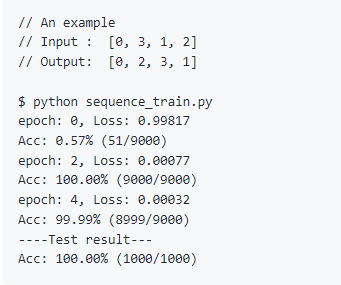

# OpenAI Gym Example

In [48]:
# pip install gym[all]

In [49]:
import gym
env = gym.make('MountainCar-v0')

OpenAl has developed a lot of environment, the following is the demo of mountain car game.

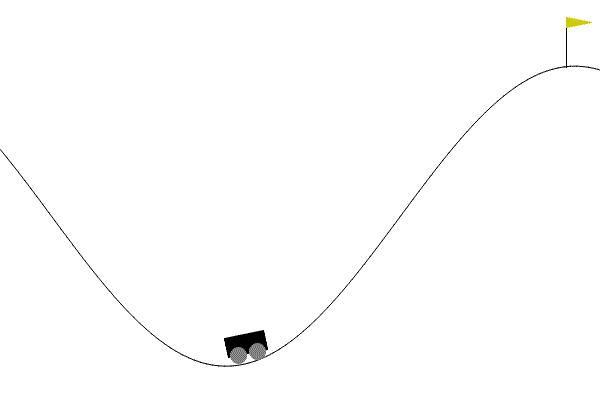

In [50]:
# Observation and action space 
print("The observation space: {}".format(env.observation_space))
print("The action space: {}".format(env.action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [51]:
#reset the environment to initial state
original_observation = env.reset()#reset() returns the initial observations
print("original observation: ",original_observation)

#get a random action from the action space
#in this case, the numerical value of an action can be either 0,1, or 2
random_action = env.action_space.sample()

#take the action
observations, rewards, dones, infos = env.step(random_action)
print("current observations:{},\trewards:{}".format(observations,rewards))

original observation:  [-0.55986327  0.        ]
current observations:[-5.5959183e-01  2.7144747e-04],	rewards:-1.0


In [53]:
# Create video device for google colab
# Suppress pygame's attempt to use a real display device by telling SDL to use a dummy driver 
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

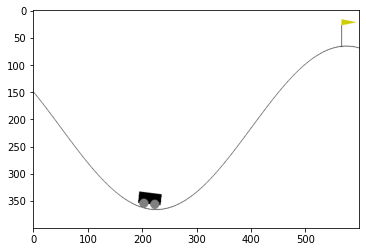

In [54]:
import matplotlib.pyplot as plt
#plot the current game image
state_img = env.render(mode = "rgb_array")
plt.imshow(state_img)

In [55]:
# Number of steps you run the agent
num_steps = 400
env = gym.make('MountainCar-v0')
_ = env.reset()

for step in range(num_steps):
    # take random action
    action = env.action_space.sample()
    
    # apply the action
    observations, rewards, done, info = env.step(action)
    
    #you can to install dependencies such as pygame or box2d to render the game
    #env.render()
    if step%10==0:
      print("current observations:{},\trewards:{},\tdone:{}\tinfo{}".format(observations,rewards,done,info))

    if done:
        print("current observations:{},\trewards:{},\tdone:{}\tinfo{}".format(observations,rewards,done,info))
        break

# Close the env
env.close()

current observations:[-0.43755624 -0.00064284],	rewards:-1.0,	done:False	info{}
current observations:[-0.4577856  -0.00358642],	rewards:-1.0,	done:False	info{}
current observations:[-0.4991629  -0.00420256],	rewards:-1.0,	done:False	info{}
current observations:[-0.52803296 -0.00193646],	rewards:-1.0,	done:False	info{}
current observations:[-0.5131012   0.00314068],	rewards:-1.0,	done:False	info{}
current observations:[-4.903918e-01  4.512714e-04],	rewards:-1.0,	done:False	info{}
current observations:[-0.5054059  -0.00267917],	rewards:-1.0,	done:False	info{}
current observations:[-0.52057844 -0.00148322],	rewards:-1.0,	done:False	info{}
current observations:[-0.54378796 -0.00294821],	rewards:-1.0,	done:False	info{}
current observations:[-5.6223553e-01  2.9973290e-04],	rewards:-1.0,	done:False	info{}
current observations:[-0.54681677  0.00174687],	rewards:-1.0,	done:False	info{}
current observations:[-0.49225056  0.00586582],	rewards:-1.0,	done:False	info{}
current observations:[-0.45623

# TF-Agents Example

In [64]:
# pip install --user tf-agents[reverb]

In [65]:
# !pip install --user tensorflow
# !pip install --user dm-reverb
# !pip install --user tf-agents

In [66]:
# # Newer versions of tensorflow-probability require newer versions of TensorFlow.
# !pip install tensorflow-probability==0.8.0
# !pip install tf-agents==0.3.0

In [70]:
# from tf_agents.environments import suite_gym
# from tf_agents.environments import tf_py_environment
# from tf_agents.agents.dqn import dqn_agent
# from tf_agents.networks import q_network
# from tf_agents.replay_buffers import tf_uniform_replay_buffer
# from tf_agents.policies import random_tf_policy
# from tf_agents.utils import common
# from tf_agents.drivers import dynamic_step_driver
# from tf_agents.policies import EpsilonGreedyPolicy
# import tensorflow as tf
# from tqdm import trange
# from tf_agents.policies.q_policy import QPolicy
# import seaborn as sns
# from matplotlib.ticker import MultipleLocator
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib notebook
 
# env_name = 'MountainCar-v0'
# env = suite_gym.load(env_name)
# train_py_env = suite_gym.load(env_name, max_episode_steps=0)
# eval_py_env = suite_gym.load(env_name, max_episode_steps=0)
# train_env = tf_py_environment.TFPyEnvironment(train_py_env)
# eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

# Keras-RL Example

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# pyqlearning Example

# Flow Example

git clone https://github.com/flow-project/flow.git
cd flow
## create a conda environment
conda env create -f environment.yml

conda activate flow

python setup.py develop
## install flow within the environment

pip install -e .